In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Analyzer

#### 시총 상위 4 종목으로 효율적 투자선 구하기
액면분할 이전 기간으로 설정 

In [2]:
mk = Analyzer.MarketDB()
stocks = ['삼성전자', 'SK하이닉스', '현대자동차', 'NAVER']
df = pd.DataFrame()
for s in stocks:
    df[s] = mk.get_daily_price(s, '2016-01-04', '2018-04-27')['close']

##### 연간 수익률
일간 변동률의 평균값에 252를 곱해 연간 수익률을 구함

In [3]:
daily_ret = df.pct_change() 
annual_ret = daily_ret.mean() * 252
daily_cov = daily_ret.cov() 
annual_cov = daily_cov * 252

In [4]:
port_ret = [] 
port_risk = [] 
port_weights = [] 

##### 몬테카를로 시뮬레이션
시총 상위 4 종목으로 구성된 포트폴리오 20,000개 생성 

In [5]:
for _ in range(20000): 
    weights = np.random.random(len(stocks)) 
    weights /= np.sum(weights) 

    returns = np.dot(weights, annual_ret) 
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights))) 

    port_ret.append(returns) 
    port_risk.append(risk) 
    port_weights.append(weights) 

In [6]:
portfolio = {'Returns': port_ret, 'Risk': port_risk} 

In [7]:
for i, s in enumerate(stocks): 
    portfolio[s] = [weight[i] for weight in port_weights] 

In [8]:
df = pd.DataFrame(portfolio) 
df = df[['Returns', 'Risk'] + [s for s in stocks]]

##### 효율적 투자선 그리기

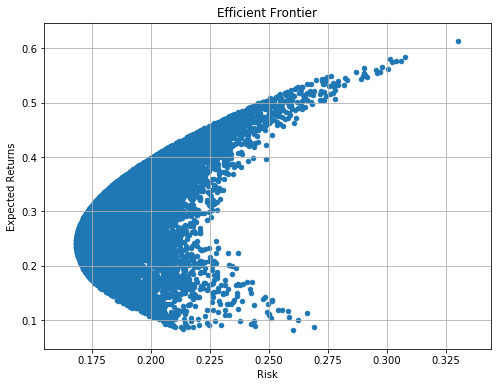

In [9]:
df.plot.scatter(x='Risk', y='Returns', figsize=(8, 6), grid=True)
plt.title('Efficient Frontier') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.show() 

    좌측의 파란색 점들이 곡선으로 이어져 보이는 부분이 효율적 투자선
    = 주어진 리스크에서 최대 수익을 내는 포트폴리오의 집합